In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bikes_df = pd.read_csv('datasets/current_bluebikes_stations.csv', header=1)
bikes_df.head()

,Number,Name,Latitude,Longitude,District,Public,Total docks
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15
1,W32006,160 Arsenal St,42.364664,-71.175694,Watertown,Yes,11
2,A32019,175 N Harvard St,42.364475,-71.128408,Boston,Yes,17
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17


In [3]:
bikes_df.District.value_counts()

District
Boston        213
Cambridge      84
Somerville     34
Newton         15
Salem          15
Brookline      14
Everett        14
Medford         7
Watertown       6
Chelsea         6
Revere          4
Arlington       3
Malden          3
Name: count, dtype: int64

In [4]:
bikes_df.iloc[35,:]

Number                                              C32003
Name           Back Bay T Stop - Dartmouth St at Stuart St
Latitude                                         42.348074
Longitude                                        -71.07657
District                                            Boston
Public                                                 Yes
Total docks                                             19
Name: 35, dtype: object

In [5]:
bikes_df.dtypes

Number          object
Name            object
Latitude       float64
Longitude      float64
District        object
Public          object
Total docks      int64
dtype: object

In [6]:
bikes_df.isna().sum()

Number         0
Name           0
Latitude       0
Longitude      0
District       3
Public         0
Total docks    0
dtype: int64

In [7]:
bikes_df['Public'].value_counts()

Public
Yes    421
Name: count, dtype: int64

In [8]:
# convert variables to string dtype
feat = ['Name', 'District']

for feature in feat:
    # case insensitive search - set to lowercase
    #bikes_df[feature] = bikes_df[feature].apply(str.lower).str.strip()
    # apply string data type
    bikes_df[feature] = bikes_df[feature].astype('string')

In [9]:
bikes_df.dtypes

Number                 object
Name           string[python]
Latitude              float64
Longitude             float64
District       string[python]
Public                 object
Total docks             int64
dtype: object

/var/folders/f8/2flx_jzs4jb8j8rpwpqj3_nh0000gn/T/ipykernel_41383/1337869305.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District',y='Total docks', data=bikes_df, errorbar=('ci', 0), palette = "Blues")


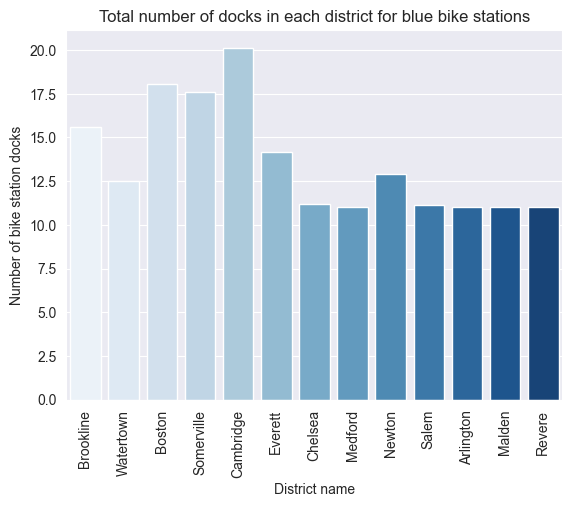

In [10]:
sns.barplot(x='District',y='Total docks', data=bikes_df, errorbar=('ci', 0), palette = "Blues")
plt.xlabel('District name')
plt.ylabel('Number of bike station docks')
plt.title('Total number of docks in each district for blue bike stations')

plt.xticks(rotation="vertical")


plt.show()

In [11]:
trip_df = pd.read_csv('datasets/202301-bluebikes-tripdata.csv')
trip_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,250,2023-01-01 00:02:54.0800,2023-01-01 00:07:04.4100,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,4213,Subscriber,02115
1,489,2023-01-01 00:10:33.3100,2023-01-01 00:18:42.3690,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3153,Customer,NaN
2,461,2023-01-01 00:10:49.9130,2023-01-01 00:18:31.1280,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3431,Customer,02186
3,1065,2023-01-01 00:13:58.0640,2023-01-01 00:31:43.5090,58,Mugar Way at Beacon St,42.355536,-71.072869,345,Park Plaza at Charles St S.,42.351828,-71.067811,4398,Customer,NaN
4,601,2023-01-01 00:14:02.6130,2023-01-01 00:24:03.8950,50,Boylston St at Berkeley St,42.351142,-71.073292,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7964,Subscriber,02138


In [12]:
trip_df.isna().sum()

tripduration                  0
starttime                     0
stoptime                      0
start station id              0
start station name            0
start station latitude        0
start station longitude       0
end station id                0
end station name              0
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
postal code                8350
dtype: int64

In [13]:
trip_df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
postal code                 object
dtype: object

In [14]:
# convert variables to string dtype
feat = ['start station name', 'end station name', 'usertype']

for feature in feat:
    # case insensitive search - set to lowercase
    #bikes_df[feature] = bikes_df[feature].apply(str.lower).str.strip()
    # apply string data type
    trip_df[feature] = trip_df[feature].astype('string')

In [15]:
# set data types for numerical timestamp values

number_feat = ['starttime', 'stoptime']

for feature in number_feat: 
    # convert data type to datetime
    trip_df[feature] = trip_df[feature].astype('datetime64[ns]')

In [16]:
trip_df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name         string[python]
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name           string[python]
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                   string[python]
postal code                        object
dtype: object

In [17]:
import geopandas 
import geodatasets
import pandas as pd
import numpy as np

In [18]:
county = geopandas.read_file("datasets/ne_10m_admin_2_counties/ne_10m_admin_2_counties.shp")
county.head()

,FEATURECLA,SCALERANK,ADM2_CODE,ISO_3166_2,ISO_A2,ADM0_SR,NAME,NAME_ALT,NAME_LOCAL,TYPE,...,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,geometry
0,Admin-2 scale rank,0,USA-53073,US-53,US,1,Whatcom,Whatcom County,None,County,...,Whatcom,Уотком,Whatcom,Whatcom,Вотком,واٹکم کاؤنٹی، واشنگٹن,Whatcom,霍特科姆县,霍特科姆縣,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532..."
1,Admin-2 scale rank,0,USA-53047,US-53,US,1,Okanogan,Okanogan County,None,County,...,Okanogan,Оканоган,Okanogan,Okanogan,Оканоґан,اوکاناگن کاؤنٹی، واشنگٹن,Okanogan,奥卡诺根县,奧卡諾根縣,"POLYGON ((-120.85196 48.99251, -120.67495 48.9..."
2,Admin-2 scale rank,0,USA-53019,US-53,US,1,Ferry,Ferry County,None,County,...,Ferry,Ферри,Ferry,Ferry,Феррі,فیری کاؤنٹی، واشنگٹن,Ferry,费里县,費里縣,"POLYGON ((-118.83688 48.99251, -118.69668 48.9..."
3,Admin-2 scale rank,0,USA-53065,US-53,US,1,Stevens,Stevens County,None,County,...,Stevens,Стивенс,Stevens,Stevens,Стівенс,سٹیونس کاؤنٹی، واشنگٹن,Stevens,史蒂文斯县,史蒂文斯縣,"POLYGON ((-118.21996 48.99251, -118.03723 48.9..."
4,Admin-2 scale rank,0,USA-53051,US-53,US,1,Pend Oreille,Pend Oreille County,None,County,...,Pend Oreille,Панд-Орей,Pend Oreille,Pend Oreille,Понд-Орей,پینڈ اورائل کاؤنٹی، واشنگٹن,Pend Oreille,庞多雷县,龐多雷縣,"POLYGON ((-117.42951 48.99251, -117.37787 48.9..."


In [19]:
county['fips'] = county['FIPS'].apply(lambda x: int(x[2:]))

<Axes: >

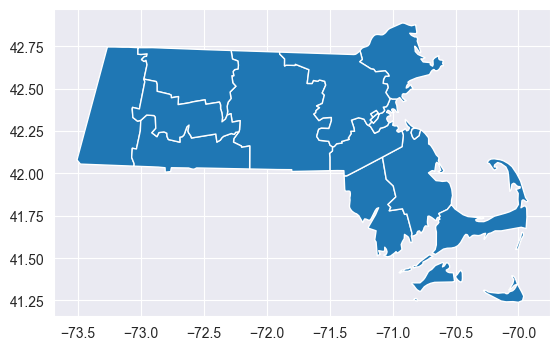

In [20]:
ma_df = county[county['ISO_3166_2'] == "US-25"]
ma_df.plot()

In [21]:
boston_counties = ['Middlesex', 'Norfolk', 'Suffolk', 'Essex']

# Filtering ma_df based on boston_counties
new_df = ma_df[ma_df['NAME'].isin(boston_counties)]
    
new_df

,FEATURECLA,SCALERANK,ADM2_CODE,ISO_3166_2,ISO_A2,ADM0_SR,NAME,NAME_ALT,NAME_LOCAL,TYPE,...,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,geometry,fips
301,Admin-2 scale rank,0,USA-25021,US-25,US,1,Norfolk,Norfolk County,None,County,...,Норфолк,Norfolk,Norfolk,Норфолк,نارفوک کاؤنٹی، میساچوسٹس,Norfolk,诺福克县,諾福克縣,"MULTIPOLYGON (((-70.82107 42.26751, -70.78380 ...",25021
302,Admin-2 scale rank,0,USA-25025,US-25,US,1,Suffolk,Suffolk County,None,County,...,Саффолк,Suffolk,Suffolk,Саффолк,سوفولک کاؤنٹی، میساچوسٹس,Suffolk,沙福克縣,沙福克縣,"POLYGON ((-71.04870 42.35944, -71.03742 42.357...",25025
303,Admin-2 scale rank,0,USA-25009,US-25,US,1,Essex,Essex County,None,County,...,Эссекс,Essex,Essex,Ессекс,ایسیکس کاؤنٹی، میساچوسٹس,Essex,艾塞克斯縣,艾塞克斯縣,"POLYGON ((-70.81428 42.87730, -70.81534 42.870...",25009
1317,Admin-2 scale rank,0,USA-25017,US-25,US,1,Middlesex,Middlesex County,None,County,...,Мидлсекс,Middlesex,Middlesex,Міддлсекс,مڈلسیکس کاؤنٹی، میساچوسٹس,Middlesex,密德瑟斯郡,密德瑟斯郡,"POLYGON ((-71.30632 42.70086, -71.29631 42.702...",25017


<Axes: >

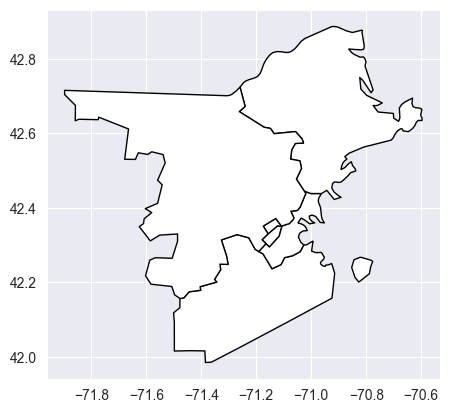

In [22]:
new_df.plot(color = 'white', edgecolor = "black")

In [23]:
import geopandas 
import geodatasets

In [24]:
from shapely.geometry import Point
#Create the geospatial data from columns

trip_df1 = trip_df.copy()
trip_df1['geometry'] = [Point(xy) for xy in zip(trip_df1['start station longitude'],
                                                 trip_df1['start station latitude'])]
trip_df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,geometry
0,250,2023-01-01 00:02:54.080,2023-01-01 00:07:04.410,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,4213,Subscriber,02115,POINT (-71.07739206866427 42.34992828230057)
1,489,2023-01-01 00:10:33.310,2023-01-01 00:18:42.369,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3153,Customer,NaN,POINT (-71.0794677917329 42.349589423682445)
2,461,2023-01-01 00:10:49.913,2023-01-01 00:18:31.128,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3431,Customer,02186,POINT (-71.0794677917329 42.349589423682445)
3,1065,2023-01-01 00:13:58.064,2023-01-01 00:31:43.509,58,Mugar Way at Beacon St,42.355536,-71.072869,345,Park Plaza at Charles St S.,42.351828,-71.067811,4398,Customer,NaN,POINT (-71.07286870479584 42.35553628489709)
4,601,2023-01-01 00:14:02.613,2023-01-01 00:24:03.895,50,Boylston St at Berkeley St,42.351142,-71.073292,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7964,Subscriber,02138,POINT (-71.07329249382019 42.3511419825475)


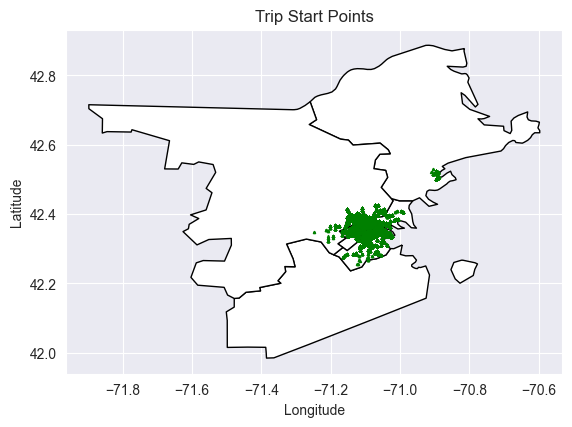

In [25]:
from geopandas import GeoDataFrame
# Create the GeoDataFrame
gdf = GeoDataFrame(trip_df1, geometry='geometry')

# Plotting
base = new_df.plot(color = 'white', edgecolor = 'black')

# Plot trip points
gdf.plot(ax=base, marker='^', color='green', markersize=2)

plt.title('Trip Start Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [26]:
point_gdf = gdf.explode(index_parts = True)
point_gdf.head()

,,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,geometry
0,0,250,2023-01-01 00:02:54.080,2023-01-01 00:07:04.410,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,4213,Subscriber,02115,POINT (-71.07739 42.34993)
1,0,489,2023-01-01 00:10:33.310,2023-01-01 00:18:42.369,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3153,Customer,NaN,POINT (-71.07947 42.34959)
2,0,461,2023-01-01 00:10:49.913,2023-01-01 00:18:31.128,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3431,Customer,02186,POINT (-71.07947 42.34959)
3,0,1065,2023-01-01 00:13:58.064,2023-01-01 00:31:43.509,58,Mugar Way at Beacon St,42.355536,-71.072869,345,Park Plaza at Charles St S.,42.351828,-71.067811,4398,Customer,NaN,POINT (-71.07287 42.35554)
4,0,601,2023-01-01 00:14:02.613,2023-01-01 00:24:03.895,50,Boylston St at Berkeley St,42.351142,-71.073292,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7964,Subscriber,02138,POINT (-71.07329 42.35114)


In [27]:
point_gdf1 = point_gdf.drop(['starttime', 'stoptime'], axis=1)

In [28]:
point_gdf1

,,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,geometry
0,0,250,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,4213,Subscriber,02115,POINT (-71.07739 42.34993)
1,0,489,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3153,Customer,NaN,POINT (-71.07947 42.34959)
2,0,461,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3431,Customer,02186,POINT (-71.07947 42.34959)
3,0,1065,58,Mugar Way at Beacon St,42.355536,-71.072869,345,Park Plaza at Charles St S.,42.351828,-71.067811,4398,Customer,NaN,POINT (-71.07287 42.35554)
4,0,601,50,Boylston St at Berkeley St,42.351142,-71.073292,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7964,Subscriber,02138,POINT (-71.07329 42.35114)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140335,0,1512,33,Kenmore Square,42.348706,-71.097009,330,30 Dane St,42.381001,-71.104025,7891,Subscriber,02143,POINT (-71.09701 42.34871)
140336,0,350,566,Main Street/Albany Street/Technology Square,42.362902,-71.091567,386,Sennott Park Broadway at Norfolk Street,42.368605,-71.099302,7554,Subscriber,02139,POINT (-71.09157 42.36290)
140337,0,2174,583,Broad Canal Way at Third Street,42.363045,-71.082871,452,1200 Beacon St,42.344149,-71.114674,8481,Subscriber,02445,POINT (-71.08287 42.36305)
140338,0,149,183,Alewife MBTA at Steel Place,42.395588,-71.142606,319,84 Cambridgepark Dr,42.393600,-71.143941,8059,Subscriber,02140,POINT (-71.14261 42.39559)


In [29]:
import folium

In [30]:
m = new_df.explore(
    column = "NAME", 
    tooltip = 'NAME', 
    popup = ['NAME'],
    legend = True
)
m

<Axes: >

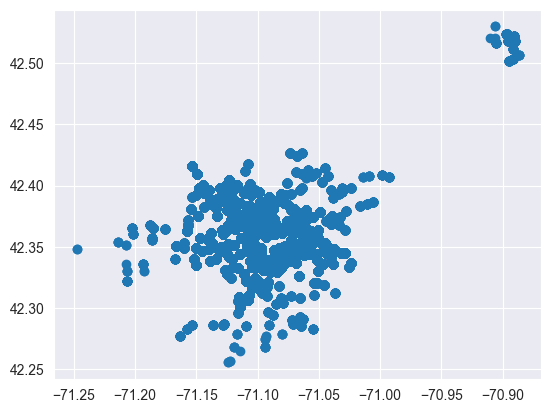

In [31]:
point_gdf.plot()

In [32]:
m = new_df.explore(
    column = "NAME", 
    tooltip = 'NAME', 
    popup = ['NAME'],
    legend = True
)

point_gdf1.explore(
    m = m,
    color = "blue", 
    marker_kwds = dict(radius = 3, fill = True), 
    tooltip = 'start station name', 
    name = "stations"
)

folium.TileLayer("CartoDB positron", show = False).add_to(m)
folium.LayerControl().add_to(m)

In [33]:
m.save('figure.html')

In [34]:
trip_df1

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,geometry
0,250,2023-01-01 00:02:54.080,2023-01-01 00:07:04.410,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,4213,Subscriber,02115,POINT (-71.07739206866427 42.34992828230057)
1,489,2023-01-01 00:10:33.310,2023-01-01 00:18:42.369,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3153,Customer,NaN,POINT (-71.0794677917329 42.349589423682445)
2,461,2023-01-01 00:10:49.913,2023-01-01 00:18:31.128,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3431,Customer,02186,POINT (-71.0794677917329 42.349589423682445)
3,1065,2023-01-01 00:13:58.064,2023-01-01 00:31:43.509,58,Mugar Way at Beacon St,42.355536,-71.072869,345,Park Plaza at Charles St S.,42.351828,-71.067811,4398,Customer,NaN,POINT (-71.07286870479584 42.35553628489709)
4,601,2023-01-01 00:14:02.613,2023-01-01 00:24:03.895,50,Boylston St at Berkeley St,42.351142,-71.073292,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7964,Subscriber,02138,POINT (-71.07329249382019 42.3511419825475)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140335,1512,2023-01-31 23:48:32.137,2023-02-01 00:13:44.245,33,Kenmore Square,42.348706,-71.097009,330,30 Dane St,42.381001,-71.104025,7891,Subscriber,02143,POINT (-71.097009 42.348706)
140336,350,2023-01-31 23:50:02.279,2023-01-31 23:55:52.490,566,Main Street/Albany Street/Technology Square,42.362902,-71.091567,386,Sennott Park Broadway at Norfolk Street,42.368605,-71.099302,7554,Subscriber,02139,POINT (-71.0915669 42.3629016)
140337,2174,2023-01-31 23:50:15.069,2023-02-01 00:26:29.504,583,Broad Canal Way at Third Street,42.363045,-71.082871,452,1200 Beacon St,42.344149,-71.114674,8481,Subscriber,02445,POINT (-71.08287078916874 42.36304549626695)
140338,149,2023-01-31 23:51:36.447,2023-01-31 23:54:05.568,183,Alewife MBTA at Steel Place,42.395588,-71.142606,319,84 Cambridgepark Dr,42.393600,-71.143941,8059,Subscriber,02140,POINT (-71.14260613918304 42.39558845716709)


In [35]:
trip_df1

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,geometry
0,250,2023-01-01 00:02:54.080,2023-01-01 00:07:04.410,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,21,Prudential Center - 101 Huntington Ave,42.346520,-71.080658,4213,Subscriber,02115,POINT (-71.07739206866427 42.34992828230057)
1,489,2023-01-01 00:10:33.310,2023-01-01 00:18:42.369,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3153,Customer,NaN,POINT (-71.0794677917329 42.349589423682445)
2,461,2023-01-01 00:10:49.913,2023-01-01 00:18:31.128,372,Boylston St at Exeter St,42.349589,-71.079468,404,Mass Ave T Station,42.341356,-71.083370,3431,Customer,02186,POINT (-71.0794677917329 42.349589423682445)
3,1065,2023-01-01 00:13:58.064,2023-01-01 00:31:43.509,58,Mugar Way at Beacon St,42.355536,-71.072869,345,Park Plaza at Charles St S.,42.351828,-71.067811,4398,Customer,NaN,POINT (-71.07286870479584 42.35553628489709)
4,601,2023-01-01 00:14:02.613,2023-01-01 00:24:03.895,50,Boylston St at Berkeley St,42.351142,-71.073292,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7964,Subscriber,02138,POINT (-71.07329249382019 42.3511419825475)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140335,1512,2023-01-31 23:48:32.137,2023-02-01 00:13:44.245,33,Kenmore Square,42.348706,-71.097009,330,30 Dane St,42.381001,-71.104025,7891,Subscriber,02143,POINT (-71.097009 42.348706)
140336,350,2023-01-31 23:50:02.279,2023-01-31 23:55:52.490,566,Main Street/Albany Street/Technology Square,42.362902,-71.091567,386,Sennott Park Broadway at Norfolk Street,42.368605,-71.099302,7554,Subscriber,02139,POINT (-71.0915669 42.3629016)
140337,2174,2023-01-31 23:50:15.069,2023-02-01 00:26:29.504,583,Broad Canal Way at Third Street,42.363045,-71.082871,452,1200 Beacon St,42.344149,-71.114674,8481,Subscriber,02445,POINT (-71.08287078916874 42.36304549626695)
140338,149,2023-01-31 23:51:36.447,2023-01-31 23:54:05.568,183,Alewife MBTA at Steel Place,42.395588,-71.142606,319,84 Cambridgepark Dr,42.393600,-71.143941,8059,Subscriber,02140,POINT (-71.14260613918304 42.39558845716709)


In [36]:
import altair as alt
chart = alt.Chart(trip_df1)

In [37]:
# create scatterplot with single selection

selection = alt.selection_single()

alt.Chart(trip_df1).mark_circle().encode(
    x='start station longitude:Q',
    y='start station latitude:Q',
    tooltip=['start station name:N'],
).add_params(
    selection
).properties(width=700, height=300, 
             title='Average personal income vs personal health score for all countries based on region')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

Try enabling the VegaFusion data transformer which raises this limit by pre-evaluating data
transformations in Python.
    >> import altair as alt
    >> alt.data_transformers.enable("vegafusion")

Or, see https://altair-viz.github.io/user_guide/large_datasets.html for additional information
on how to plot large datasets.

alt.Chart(...)